In [24]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate as interpol

In [2]:
nsamp=1000
dT_LGM = np.random.normal(loc=-5.0,scale=1.0,size=nsamp)
dF_LGM = np.random.normal(loc=-8.8,scale=2.0,size=nsamp)
values_LGM = np.zeros((2,nsamp))
values_LGM[0]=dT_LGM
values_LGM[1]=dF_LGM
kde_LGM = stats.gaussian_kde(values_LGM)
density_LGM = kde_LGM(values_LGM)


In [25]:
values_inverse=np.zeros((2,nsamp))
values_inverse[1]=dT_LGM
values_inverse[0]=dF_LGM
kde_inverse = stats.gaussian_kde(values_inverse)

<IPython.core.display.Javascript object>


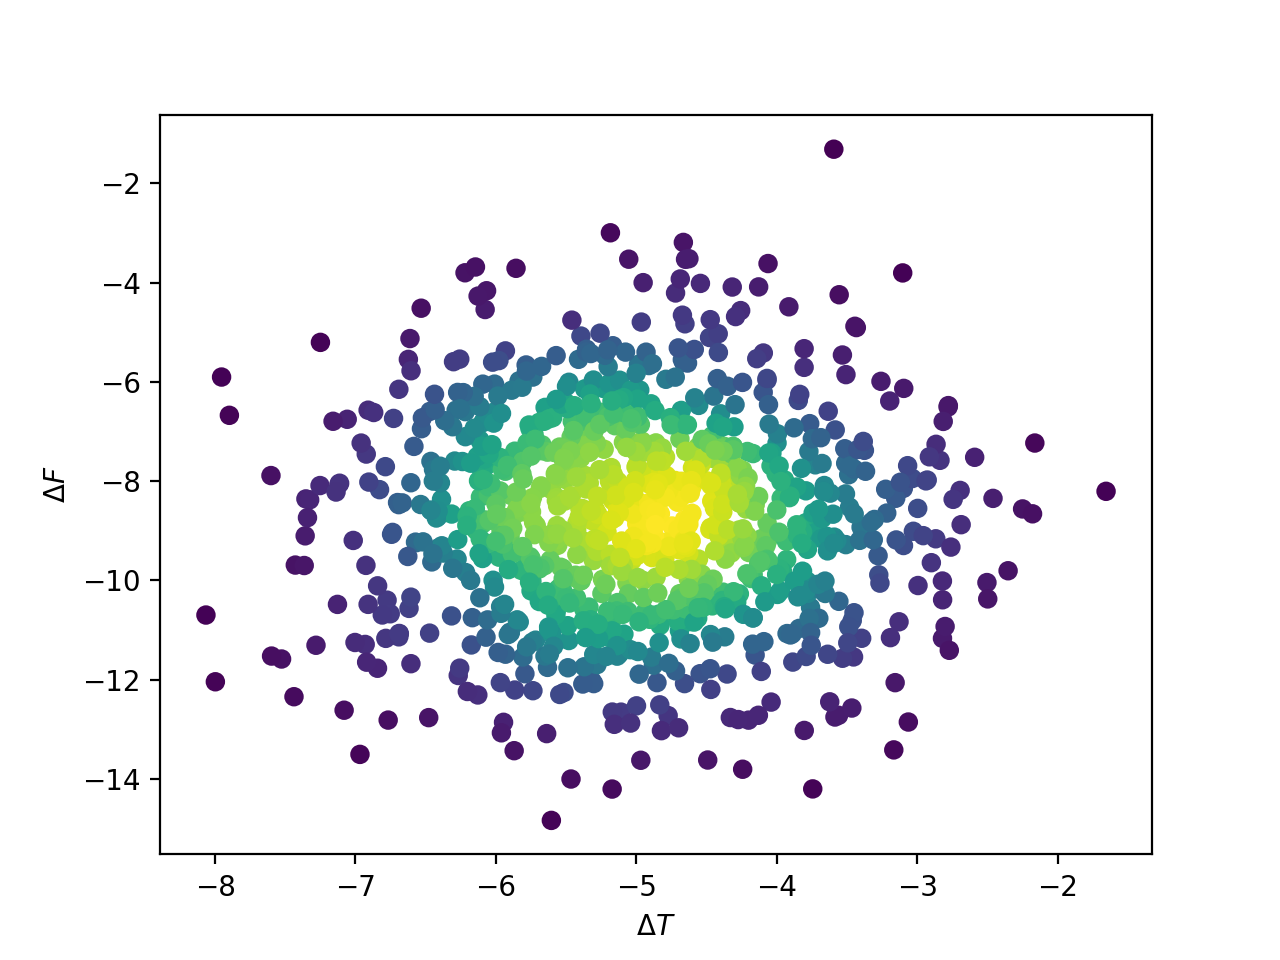

Text(0.5, 0, '$\\Delta T$')

In [12]:
plt.figure()
ax_LGM=plt.subplot(111)
ax_LGM.scatter(dT_LGM,dF_LGM,c=density_LGM)
ax_LGM.set_ylabel(r"$\Delta F$")
ax_LGM.set_xlabel(r"$\Delta T$")

In [13]:
nbins=int(nsamp/10)
S_possibilities = np.linspace(.1,10,num=nbins)
S_possibilities_big = np.linspace(.1,10,num=nsamp)
F2x=3.7

def get_LGM_likelihood(S_possibilities):
    likelihood_LGM = []

    Ts = np.linspace(-100,100,nsamp)
    
    for S in S_possibilities:
        #the plane is given by
        Fs=Ts*(F2x/S)
        #now evaluate the kernel density on the plane using kde
        Svals=np.vstack((Ts,Fs))
        likelihood_LGM += [np.max(kde_LGM(Svals))]
    return likelihood_LGM/np.max(likelihood_LGM)
def interpl_LGM(S_possibilities):
    likelihood_LGM = []

    Ts = np.linspace(-100,100,nsamp)
    

def get_LGM_likelihood_inverse(S_possibilities):
    likelihood_LGM_inverse = []
    
    #Fs = np.linspace(np.min(dF_LGM),np.max(dF_LGM),nsamp)
    Fs=np.linspace(-20,0,nsamp)
    for S in S_possibilities:
        #the plane is given by
        Ts=S*Fs/F2x
        #now evaluate the kernel density on the plane using kde
        Svals=np.vstack((Fs,Ts))
        dens=kde_inverse(Svals)
        #average of 10 largest values to smooth it out
        mxs=np.argsort(-1*dens)[:100]
        lk=np.max(dens)
        likelihood_LGM_inverse += [lk]
    return likelihood_LGM_inverse/np.max(likelihood_LGM_inverse)

def get_LGM_likelihood_inverse2(S_possibilities):
    likelihood_LGM_inverse = []

    #Fs = np.linspace(np.min(dF_LGM),np.max(dF_LGM),nsamp)
    Fs=np.linspace(-50,0,nsamp)
    for S in S_possibilities:
        #the plane is given by
        Ts=S*Fs/F2x
        #now evaluate the kernel density on the plane using kde
        Svals=np.vstack((Fs,Ts))
        likelihood_LGM_inverse += [np.average(kde_inverse(Svals))]
    return likelihood_LGM_inverse/np.max(likelihood_LGM_inverse)
def webb_likelihood(S_possibilities):
    Tav=np.average(dT_LGM)
    epsilon=dT_LGM/Tav
    likelihood_webb=[]
    for S in S_possibilities:
        dTsynth=S*dF_LGM/F2x+epsilon
        kde_webb = stats.gaussian_kde(dTsynth) 
        likelihood_webb+=[float(kde_webb(Tav))]
    return likelihood_webb/np.max(likelihood_webb)

likelihood=get_LGM_likelihood(S_possibilities)

#likelihood_inverse=get_LGM_likelihood_inverse(S_possibilities)
#likelihood_inverse2=get_LGM_likelihood_inverse2(S_possibilities)

#likelihood2=get_LGM_likelihood(S_possibilities)
lwebb=webb_likelihood(S_possibilities_big)

<IPython.core.display.Javascript object>


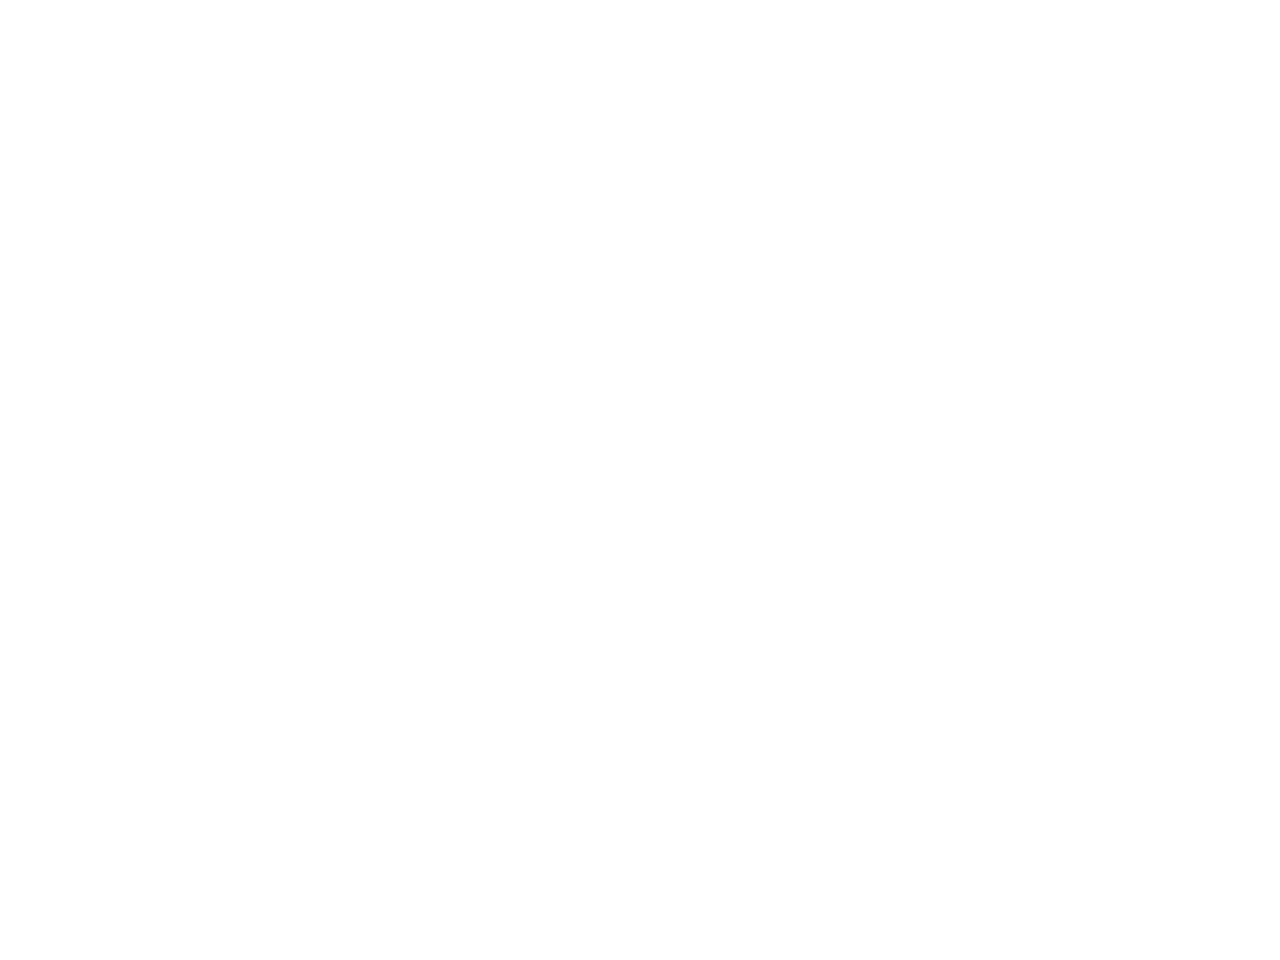

In [6]:
plt.figure()
plt.plot(S_possibilities,likelihood,label="2d method")
#plt.plot(S_possibilities,likelihood,label="potato 2 method")
#plt.plot(S_possibilities,likelihood_inverse,label="inverse 2d method")
#plt.plot(S_possibilities,likelihood_inverse2,label="inverse with averaging method")
plt.plot(S_possibilities_big,lwebb,label="WCRP method")
plt.legend()

<IPython.core.display.Javascript object>


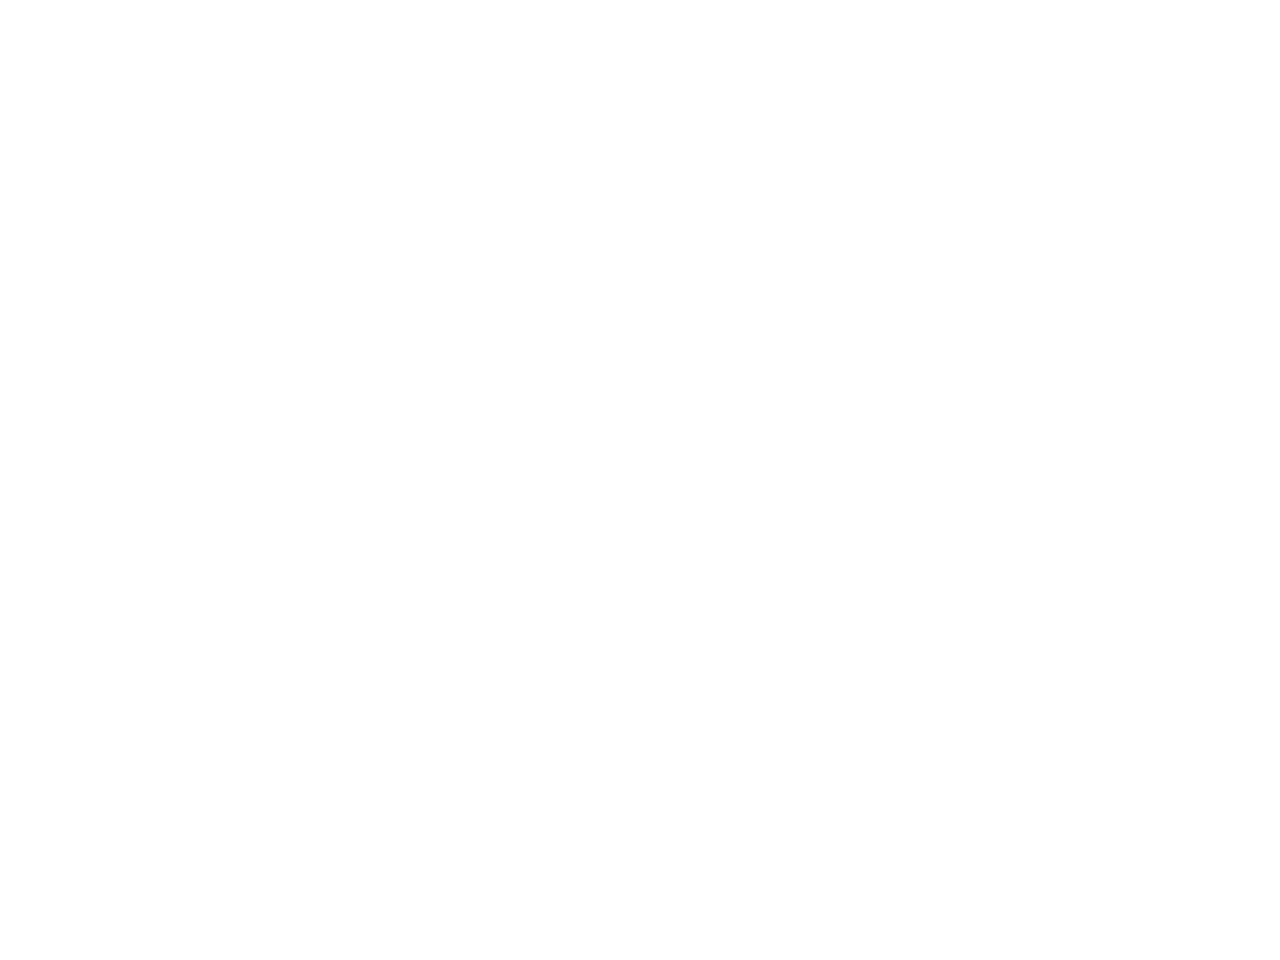

10.0
10.0


In [7]:
def disttest(S):
    Tmin=-10
    Tmax=5
    p1=np.array([Tmin,Tmin*F2x/S])
    p2=np.array([Tmax,Tmax*F2x/S])
    p3=values_LGM.T
    d=np.abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    return d
plt.figure()
test=np.array([1./np.average(disttest(S)) for S in S_possibilities_big])
test2=np.array([1./np.median(disttest(S)) for S in S_possibilities_big])
test3=np.array([np.sum(disttest(S)) for S in S_possibilities_big])
plt.plot(S_possibilities,likelihood,label="potato method")
plt.plot(S_possibilities_big,test2/np.max(test2))
#plt.plot(S_possibilities_big,-1*test3/np.min(1*test3))
print(S_possibilities_big[np.argmin(test)])
print(S_possibilities_big[np.argmin(test2)])


In [8]:
values_LGM.shape

(2, 1000)

Why does inverting the potato method give you different results?

<IPython.core.display.Javascript object>


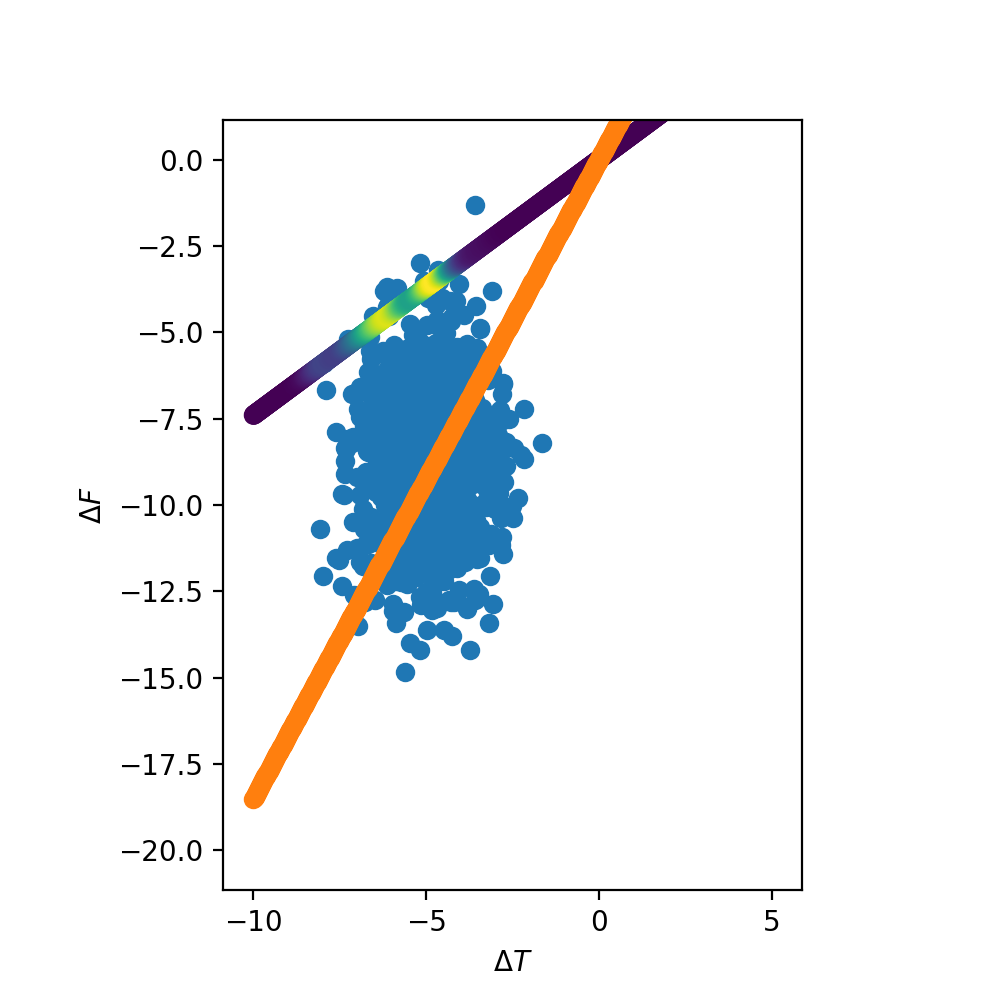

<IPython.core.display.Javascript object>


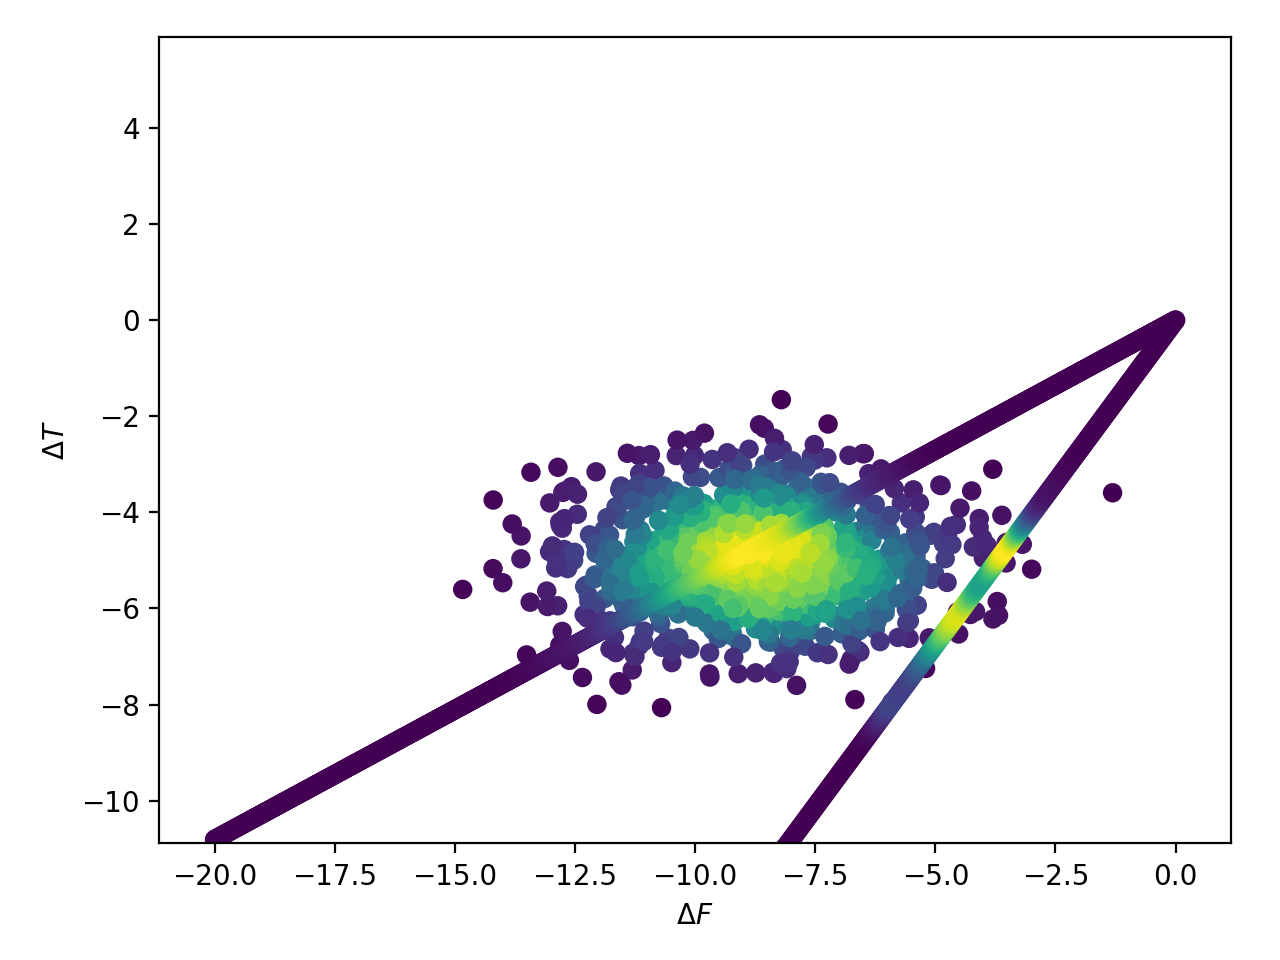

In [15]:
S=5.0

Ts5 = np.linspace(-10,5,nsamp)
Fs5=Ts5*(F2x/S)
fig1=plt.figure(figsize=(5,5))
ax1=fig1.add_subplot(111)
plt.scatter(dT_LGM,dF_LGM)#,c=density_LGM)
ax1.scatter(Ts5,Fs5,c=kde_LGM((Ts5,Fs5)))
plt.xlabel(r'$\Delta T$')
plt.ylabel(r'$\Delta F$')

fig2=plt.figure()
ax2=fig2.add_subplot(111)
Fsinv5=np.linspace(-20,0,nsamp)
Tsinv5=S*Fsinv5/F2x
ax2.scatter(dF_LGM,dT_LGM,c=kde_inverse(values_inverse))
#ax2.scatter(Fsinv5,Tsinv5)


inv5=np.max(kde_inverse(np.vstack((Fsinv5,Tsinv5))))
inv5_mod=np.max(kde_LGM(np.vstack((Tsinv5,Fsinv5))))
pot5=np.max(kde_LGM(np.vstack((Ts5,Fs5))))

S=2.0
Ts2 = np.linspace(-10,5,nsamp)
Fs2=Ts2*(F2x/S)

ax1.scatter(Ts2,Fs2)


Fsinv2=np.linspace(-20,0,nsamp)
Tsinv2=S*Fsinv2/F2x
ax2.scatter(Fsinv2,Tsinv2,c=kde_inverse((Fsinv2,Tsinv2)))
ax2.scatter(Fsinv5,Tsinv5,c=kde_inverse((Fsinv5,Tsinv5)))
#ax2.scatter(Fsinv2,Tsinv2)
plt.ylabel(r'$\Delta T$')
plt.xlabel(r'$\Delta F$')

inv2=np.max(kde_inverse(np.vstack((Fsinv2,Tsinv2))))
inv2_mod=np.max(kde_LGM(np.vstack((Tsinv2,Fsinv2))))
pot2=np.max(kde_LGM(np.vstack((Ts2,Fs2))))

ax2.set_ylim(ax1.get_xlim())
ax1.set_ylim(ax2.get_xlim())
plt.tight_layout()
ax2.set_aspect("equal",adjustable="box")
ax1.set_aspect("equal",adjustable="box")


In [16]:
print(pot2/pot5)
print(inv2/inv5)


11.308716587718495
11.30824674483051


<IPython.core.display.Javascript object>


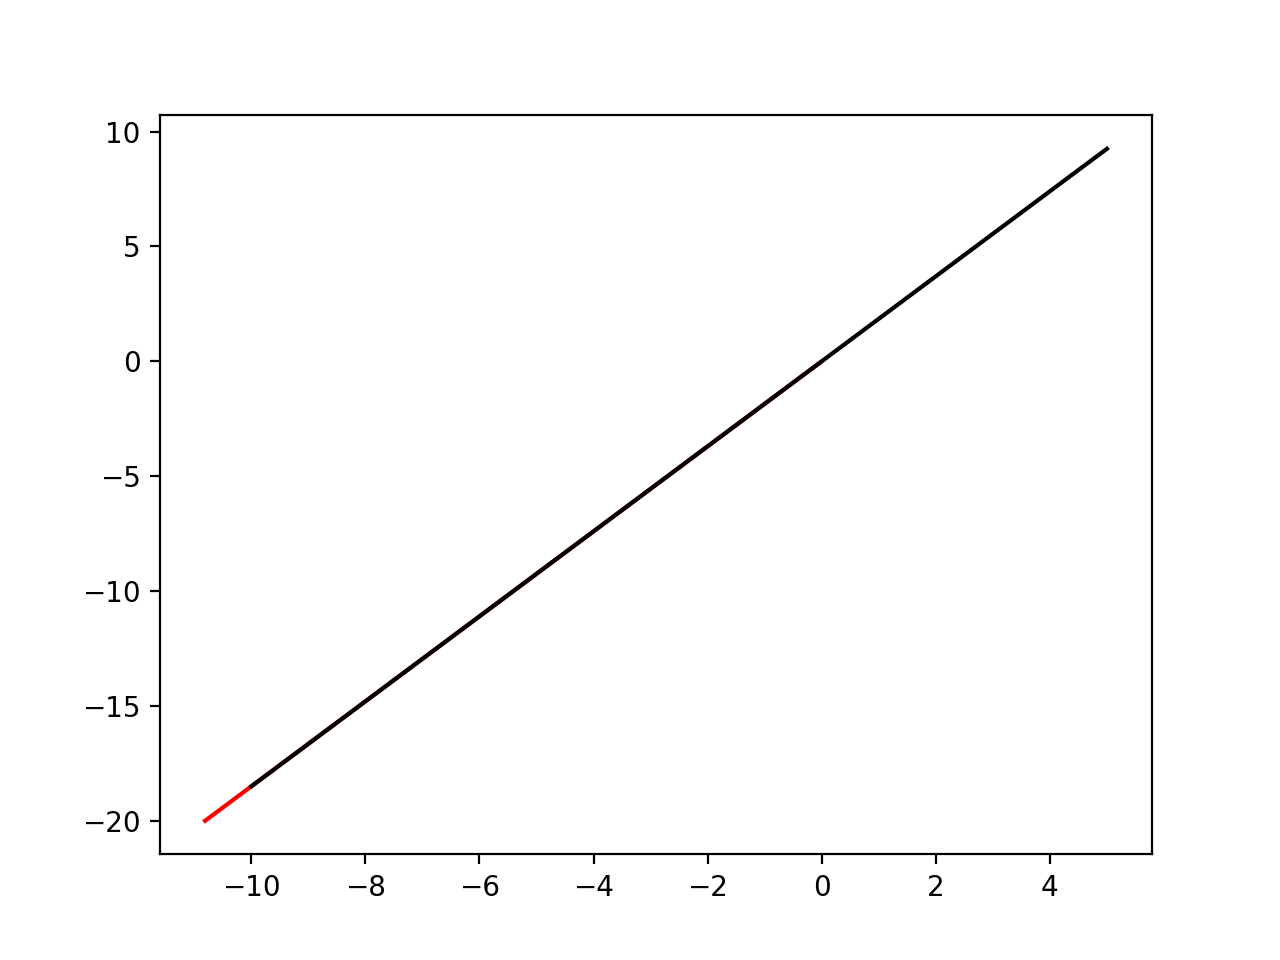

In [18]:
plt.figure()
plt.plot(Tsinv2,Fsinv2,c="r")
plt.plot(Ts2,Fs2,c="k")

In [ ]:
print(np.min(Fsinv2))

<IPython.core.display.Javascript object>


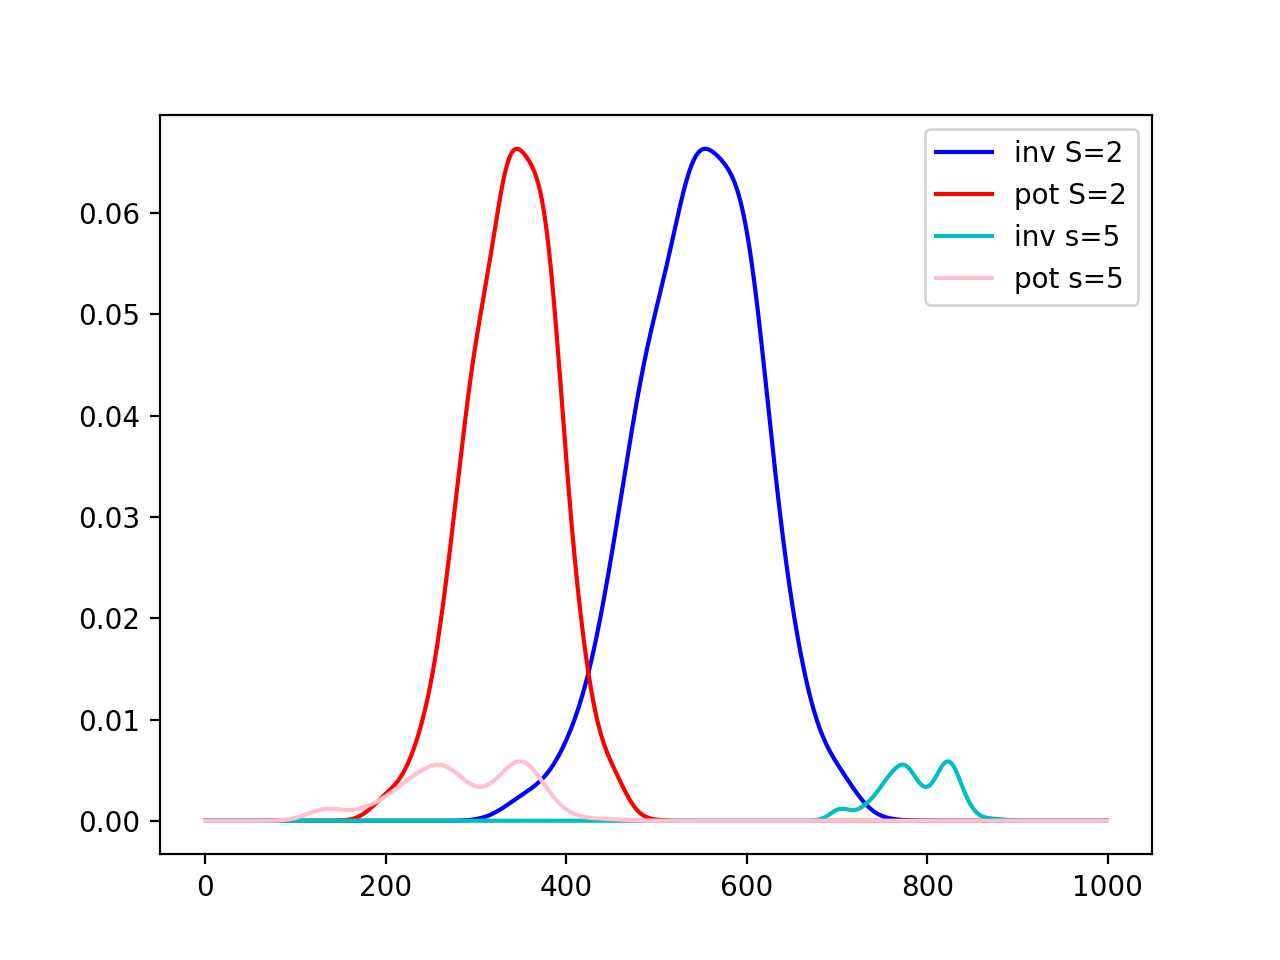

In [23]:
plt.figure()
dens=kde_LGM((Tsinv2,Fsinv2))
#mxs=np.argsort(-1*dens)[:100]
#X=np.arange(len(dens))


#plt.scatter(Tsinv2,Fsinv2,c=kde_LGM((Tsinv2,Fsinv2)))
#plt.scatter(Tsinv5,Fsinv5,c=kde_LGM((Tsinv5,Fsinv5)))
plt.plot(kde_LGM((Tsinv2,Fsinv2)),c="b",label="inv S=2")
plt.plot(kde_LGM((Ts2,Fs2)),c="r",label="pot S=2")
plt.plot(kde_LGM((Tsinv5,Fsinv5)),c="c",label="inv s=5")
plt.plot(kde_LGM((Ts5,Fs5)),c="pink",label="pot s=5")
plt.legend()

<IPython.core.display.Javascript object>


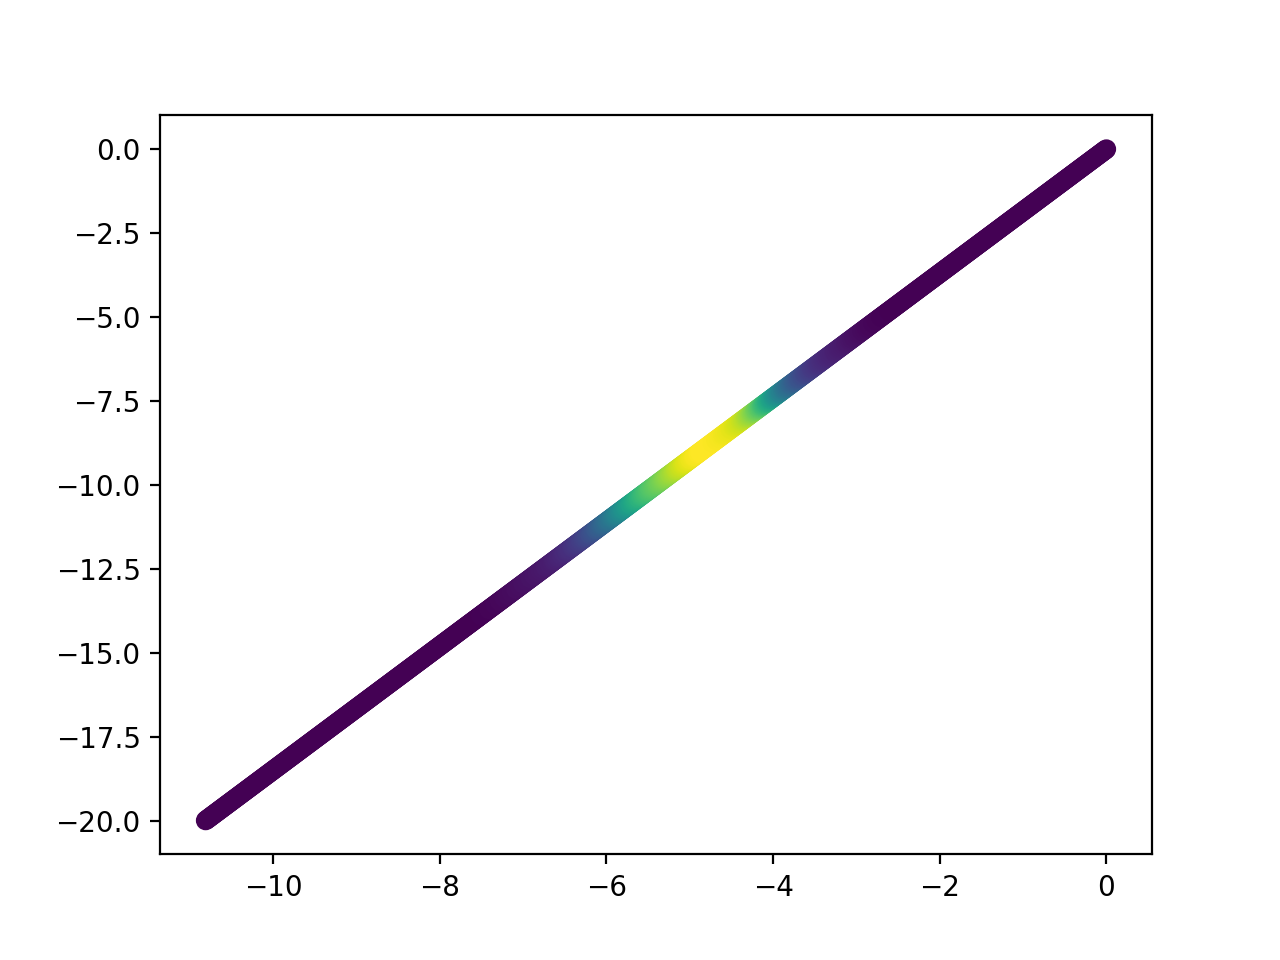

<IPython.core.display.Javascript object>


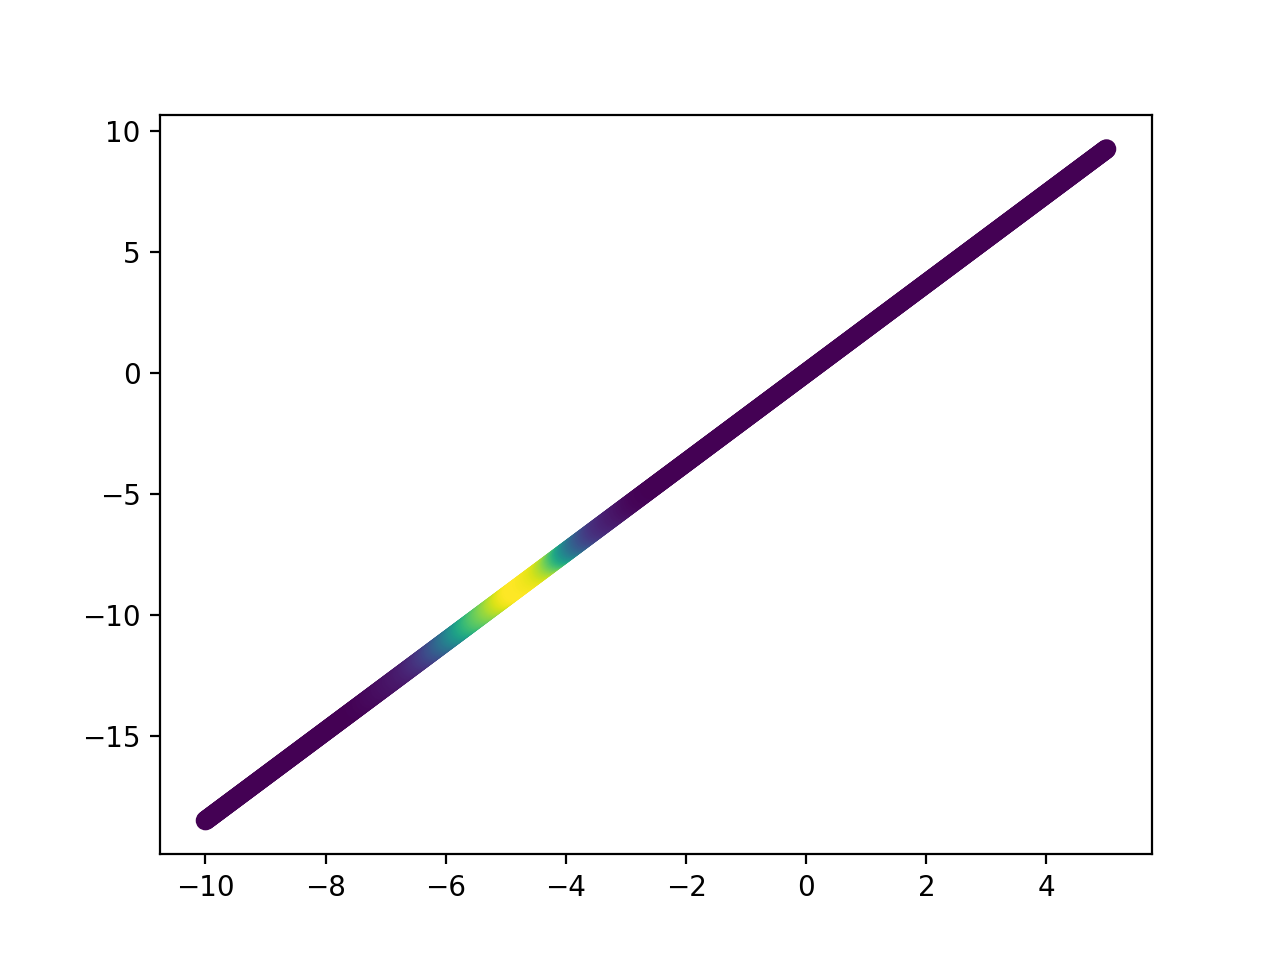

In [21]:
plt.figure()
plt.scatter(Tsinv2,Fsinv2,c=kde_LGM((Tsinv2,Fsinv2)))
plt.figure()
plt.scatter(Ts2,Fs2,c=kde_LGM((Ts2,Fs2)))

In [31]:
lgm_data=(dT_LGM,dF_LGM)
xx,yy=

ValueError: Invalid length for input z for non rectangular grid

<IPython.core.display.Javascript object>


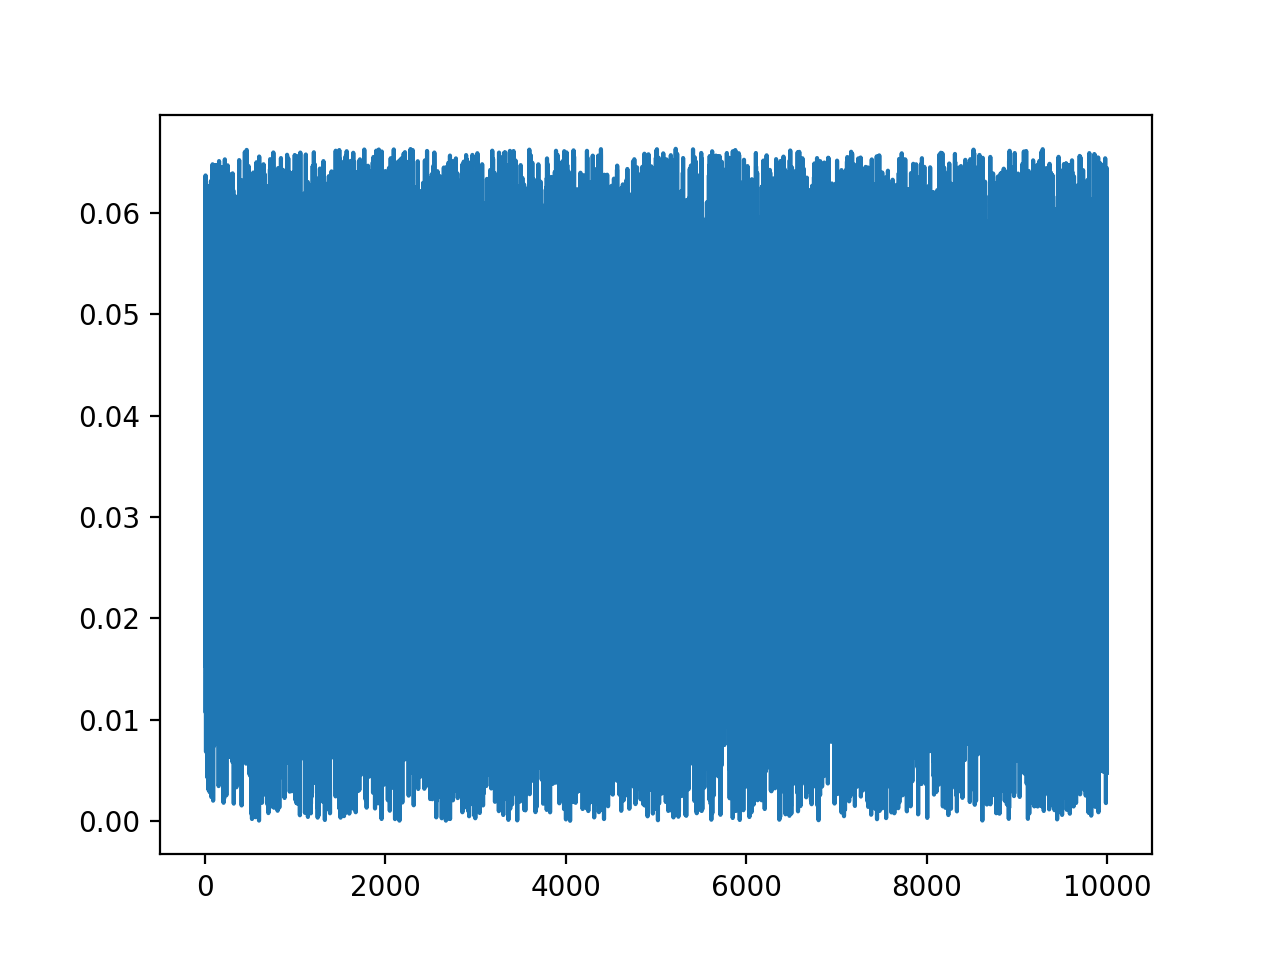

In [40]:
sample=kde_LGM.resample(size=10000)
